In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X the features can be considered as input from other neurons.

A given neuron will then output a signal which is a combination of the inputs, weighted by the strenght of 
those input neurons to this output neuron.

$$ y = sigmoid (w_1 * x_1 + w_2 *x_2 + ... + w_n * x_n) $$

We ignore the bias term since it can readily be incoporated by adding an extra dimension, $x_0$, which is always 1.

You can interpret the output as a probability, $P(y=1 | x, \theta) $, which will be used interchangibly with $y$.


A very positive weight would be a excitatory connection, a very negative weight an inhibitory conection.

# Feedforward Action

Suppose we have a 1-hidden layer neural net:
$x$ is the input, $z$ is the hidden layer, and $y$ is the output layer.

$$z_1 = s(w_{11}*x_1 + w_{12}*x_2 )$$
$$z_2 = s(w_{21}*x_1 + w_{22}*x_2 )$$

Where $s$ is any non-linear function.
The three most common choices are:
* Sigmoid
* Hyperbolic tangent - Scaled version of the sigmoid function as it is centered around 0.
* Rectifier linear unit (ReLU)
 * ```
    if x < 0:
        return 0
    else:
        return x
    ```

$y$ can be computed as

$$y = s\prime (v_1 *z_1 + v_2 *z_2)$$

Where $s\prime$ is either a `sigmoid` or a `softmax`.

Note that inside the `sigmoid` functions we simply have the dot product between the input and the weights.

# Softmax

In [7]:
# activation at last layer of NN
a = np.random.randn(5)
expa = np.exp(a)
softmax = expa / expa.sum()

In [8]:
# probabilities should add up to 1
softmax.sum()

1.0000000000000002

In [9]:
# Matrix
A = np.random.randn(100, 5) # 100 samples in 5 classes
expA = np.exp(A) # all positive
# we want each row to sum up to 1
# softmax = expA / expA.sum(axis=1) cannot be broadcasted -> div 1-D array by 2-D array
softmax = expA / expA.sum(axis=1, keepdims=True) 

# sanity check
print(softmax.sum(axis=1))
print(expA.sum(axis=1).shape)
print(expA.sum(axis=1, keepdims=True).shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
(100,)
(100, 1)


# Building a Feedforward Neural Network

In [21]:
def sigmoid(a):
    return 1.0 / ( 1.0 + np.exp(-a))

def softmax(a):                                                                 
    expA = np.exp(a)                                                            
    return expA / expA.sum(axis=1, keepdims=True)
                  
def forward(X, W1, b1, W2, b2):
    """ Sigmoid non-linearity in Hidden layers. """
    # value at the hidden layer
    #Z = sigmoid( X.dot(W1)+b1 )
    Z = np.tanh( X.dot(W1)+b1 )
    # softmax at the next layer
    Y = softmax( Z.dot(W2)+b2 )
    return Y

def classification_rate(target_labels, predicted_labels):
    return np.mean(target_labels==predicted_labels)

def scatter(x, y):
    plt.scatter(x[:,0], x[:,1], c=y, s=100, alpha=0.5)
    plt.show();
    
def y2indicator(y, K):
    '''Transfor Y into an indicator matrix
    The indicator matrix will be an NxK matrix.
    
    N : number of samples
    K : number of classes in the output
    '''
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, int(y[i])] = 1
    return ind

In [22]:
Nclass = 500 # 500 samples per class
D = 2 # dimensions
M = 3 # Number of Hidden layers
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# create labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

Classification rate for randomly chosen weights: 0.344666666667


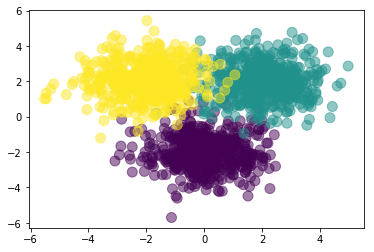

In [23]:
P_Y_given_X = forward(X, W1, b1, W2, b2)                                        
P = np.argmax(P_Y_given_X, axis=1)                                                                                                     
    
# can you explain why the answer should be close to 1/3?
print( "Classification rate for randomly chosen weights:", classification_rate(Y, P) )
scatter(X,Y)

## Example

In [24]:
def get_data(df):                                                                                                            
    data = df.as_matrix()                                                       
                                                                                
    X = data[:,:-1]                                                             
    Y = data[:,-1]                                                              
                                                                                
    # normalize columns 1 and 2                                                 
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()                            
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()                            
                                                                                
    # create a new matrix X2 with the correct number of columns      
    # we want to work on the categorical column time_of_day, X[4]
    # D+3 because there are 4 diff. categorical values
    N, D = X.shape                                                              
    X2 = np.zeros((N, D+3))                                                     
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical                              
                                                                                
    # one-hot encoding for other 4 columns                                                                
    for n in range(N):                                                         
        t = int(X[n,D-1]) # get time of day                                                       
        X2[n,t+D-1] = 1                                                         
                                                                                
    # method 2                                                                  
    # Z = np.zeros((N, 4))                                                      
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1                            
    # # assign: X2[:,-4:] = Z                                                   
    # assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)                              
                                                                                
    return X2, Y                                                                
                                                                                
                                                                                
def get_binary_data(df):                                                          
    # return only the data from the first 2 classes                             
    X, Y = get_data(df)                                                           
    X2 = X[Y <= 1]                                                              
    Y2 = Y[Y <= 1]                                                              
    return X2, Y2    

In [25]:
filename= 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv'

df = pd.read_csv(filename)
df.head(3)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0


In [26]:
X, Y = get_data(df)

D = X.shape[1] # dimensions
M = 50 # Number of Hidden layers
K = len(set(Y)) # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

P_Y_given_X = forward(X, W1, b1, W2, b2)                                        
P = np.argmax(P_Y_given_X, axis=1)                                                                                                     
    
# can you explain why the answer should be close to 1/3?
print( "Classification rate for randomly chosen weights:", classification_rate(Y, P) )

Classification rate for randomly chosen weights: 0.326


## Objective function

Optimize it via Gradient Descent.
We travel along the graident of our cost function with respect to $W$ and $V$ until we hit a minimum.

```
J = - sum[n=1,...,N]( sum[k=1,...,K]( T[n,k] * logY[n,k] ) )
```


In [27]:
def cost(T, Y):
    return (T*np.log(Y)).sum()

def derivative_W2(Z, T, Y):
    return Z.T.dot(T-Y)

def derivative_W1(X, Z, T, Y, W2):
    dZ = (T-Y).dot(W2.T) * Z * (1-Z)
    return X.T.dot(dZ)

def derivative_b2(T, Y):
    return (T-Y).sum(axis=0)

def derivative_b1(T, Y, W2, Z):
    return ((T-Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

def forward(X, W1, b1, W2, b2):
    ''' O--W--O--V--O
        X    Z      Y
    '''
    #Z = relu(X.dot(W1) + b1)
    Z = sigmoid(X.dot(W1) + b1)
    Y = softmax(Z.dot(W2) + b2)
    return Y, Z

epoch: 0 cost: -226.31686185319495. classification rate: 0.85
epoch: 20000 cost: -156.65550677440837. classification rate: 0.896
epoch: 40000 cost: -132.27046481678383. classification rate: 0.912
epoch: 60000 cost: -118.44737323966999. classification rate: 0.916
epoch: 80000 cost: -109.0292663667261. classification rate: 0.924
epoch: 100000 cost: -102.02319372643174. classification rate: 0.928
epoch: 120000 cost: -96.32638457501653. classification rate: 0.934
epoch: 140000 cost: -91.03247299850361. classification rate: 0.942
epoch: 160000 cost: -85.32136989520377. classification rate: 0.944
epoch: 180000 cost: -78.9756559977817. classification rate: 0.952


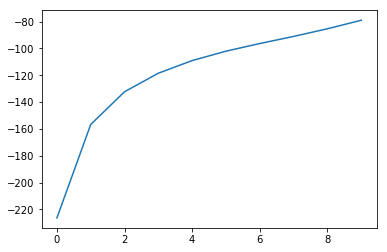

In [33]:
T = y2indicator(Y, K)

epochs = 200000
epoch_rate = 20000
learning_rate = 10e-6
costs = []
for epoch in range(epochs):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % epoch_rate == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print('epoch: {} cost: {}. classification rate: {}'.format(epoch, c, r))
        costs.append(c)
        
    W2 += learning_rate * derivative_W2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_W1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)
    
plt.plot(costs)
plt.show();